Simon's Young Moving Group (YMG): TWA, CBER, TAU, 118TAU, PL8, OCT

In [204]:
import numpy as np
import matplotlib.pyplot as plt
import math

"""
#1st HR data
sample_HR= "/content/drive/MyDrive/Research/Young Stars/AY9_workday_dataset.csv"
hr_data = np.genfromtxt(sample_HR, names='absolute_Gmag,BP_minus_RP', delimiter=",") #after last parameter, add delimiter = ","
"""

#2nd HR data
sample_HR_2 = "/content/drive/MyDrive/Research/Young Stars/Gaia_field_stars.csv"
hr_data_2 = np.genfromtxt(sample_HR_2, names='parallax,apparent_Gmag,BP_mag, RP_mag', delimiter=",")

"""
my OLD DR2 dataset
YMG_compilation= "/content/drive/MyDrive/Research/Young Stars/AY9_YMG_compilation.csv"
"""

#NEW DR3 dataset
YMG_compilation= "/content/drive/MyDrive/Research/Young Stars/srssDR3finalno.xyz.uvw.csv"
ymg_data = np.genfromtxt(YMG_compilation, names='ymg,ra,dec,parallax,pm,pmRA,pmDEC,Gmag,BPmag,RPmag,BPminusRP,BPminusG,GminusRP,radial_velocity,x,y,z,u,v,w', delimiter=",", skip_header=1) #after last parameter, add delimiter = ","

#candidates
candidates_file = "/content/drive/MyDrive/Research/Young Stars/candidatespropertiesfinal - candidatesproperties.csv"
candidates = np.genfromtxt(candidates_file, names='names,ra,dec,parallax,pm,pmra,pmdec,gmag,bp,rp,BPminusRP,BPminusG,GminusRP,rv,x,y,z,u,v,w',delimiter=",")

# `Photometry`

In [205]:
#functions exclude_neg_parallax, calc_abs_mag, plot_figure, combined_plot_figure
""" star: setting variables of x(BP-RP) and y(magnitude) """

#this function checks parallax_array for negative values, then deletes it and the entire entry for all arrays to have same size of array
def exclude_neg_parallax(color_minus_array,apparent_mag_array,parallax_array):
  new_parallax_array = []
  index_array_of_neg_parallax = []

  for i in range(0,len(parallax_array)):
    if parallax_array[i] >= 0:
      new_parallax_array.append(parallax_array[i])
    else:
      index_array_of_neg_parallax.append(i)

  for index in index_array_of_neg_parallax:
    apparent_mag_array = np.delete(apparent_mag_array,index)
    color_minus_array = np.delete(color_minus_array,index)

  return color_minus_array, apparent_mag_array, new_parallax_array

#this function calculates the absolute mag
def calc_abs_mag(apparent_mag_array, parallax_array):
  abs_mag = []

  for i in range(0,len(apparent_mag_array)):
    abs_mag_value = apparent_mag_array[i] - 5 * math.log((100/parallax_array[i]),10)
    abs_mag.append(abs_mag_value)

  return abs_mag

#since it's repetitive, this function combines the two functions above
def setting_colorminus_mag(color_minus_array, unrefined_Gmag_array, unrefined_parallax_array):

  x_array, Gmag_array, parallax_array = exclude_neg_parallax(color_minus_array, unrefined_Gmag_array, unrefined_parallax_array)
  y_array = calc_abs_mag(Gmag_array, parallax_array)

  return x_array, y_array

"""end: setting variables of x(BP-RP) and y(magnitude)"""

'end: setting variables of x(BP-RP) and y(magnitude)'

In [206]:
""" start: plotting functions """

def plot_figure(x_array,y_array,figure_name,color,star_group,color_minus):
    plt.figure(figsize=[5,5])
    plt.xlim([-5,6])
    plt.ylim([-5,20])
    plt.scatter(x_array,y_array, c=color,s=4)
    plt.xlabel(color_minus, fontsize=16)
    plt.ylabel('Abs GMag', fontsize=16)
    plt.title(star_group, fontsize=16)
    plt.legend([figure_name])
    plt.gca().invert_yaxis()

def plot_three_figures(x_bpminusrp, x_bpminusg, x_gminusrp, y_array,color,star_group):
    plt.figure(figsize=[30,10])

    plt.subplot(1,3,1)
    plt.xlim([-5,6])
    plt.ylim([-5,20])
    plt.scatter(x_bpminusrp,y_array, c=color)
    plt.xlabel("BP minus RP", fontsize=16, fontweight="heavy")
    plt.ylabel('Abs GMag', fontsize=16, fontweight="heavy")
    plt.title(star_group,fontsize=24, fontweight="heavy")
    plt.legend([star_group])
    plt.gca().invert_yaxis()

    plt.subplot(1,3,2)
    plt.xlim([-5,6])
    plt.ylim([-5,20])
    plt.scatter(x_bpminusg,y_array, c=color)
    plt.xlabel("BP minus G", fontsize=16, fontweight="heavy")
    plt.ylabel('Abs GMag', fontsize=16, fontweight="heavy")
    plt.title(star_group,fontsize=24, fontweight="heavy")
    plt.legend([star_group])
    plt.gca().invert_yaxis()

    plt.subplot(1,3,3)
    plt.xlim([-5,6])
    plt.ylim([-10,20])
    plt.scatter(x_gminusrp,y_array, c=color)
    plt.xlabel("G minus RP", fontsize=16, fontweight="heavy")
    plt.ylabel('Abs GMag', fontsize=16, fontweight="heavy")
    plt.title(star_group, fontsize=24, fontweight="heavy")
    plt.legend([star_group])
    plt.gca().invert_yaxis()

def combined_plot_figure(x_array,y_array,color,color_minus):
    plt.xlim([-5,6])
    plt.ylim([-5,20])
    plt.scatter(x_array,y_array, c=color, alpha = .75)
    plt.xlabel(color_minus, fontsize=16, fontweight="heavy")
    plt.ylabel('Abs GMag', fontsize=16, fontweight="heavy")
    plt.title(color_minus + " HR Graph", fontsize=24, fontweight="heavy")
    plt.gca().invert_yaxis()

""" end: plotting functions """

' end: plotting functions '

In [207]:
#datatset to abso mag, and get rid of negative parallax
"""
BP_minus_RP =hr_data['BP_minus_RP']
absolute_Gmag = hr_data['absolute_Gmag']
"""

BP_minus_RP_hr_data_2 = hr_data_2['BP_mag'] - hr_data_2['RP_mag']
BP_minus_G_hr_data_2 = hr_data_2['BP_mag'] - hr_data_2['apparent_Gmag']
G_minus_RP_hr_data_2 = hr_data_2['apparent_Gmag'] - hr_data_2['RP_mag']

apparent_Gmag_hr_data_2 = hr_data_2['apparent_Gmag']
parallax_hr_data_2 = hr_data_2['parallax']

x_hr_BPmiusRP_data_2, y_hr_data_2 = setting_colorminus_mag(BP_minus_RP_hr_data_2,apparent_Gmag_hr_data_2,parallax_hr_data_2)
x_hr_BPmiusG_data_2, y_hr_data_2 = setting_colorminus_mag(BP_minus_G_hr_data_2,apparent_Gmag_hr_data_2,parallax_hr_data_2)
x_hr_GmiusRP_data_2, y_hr_data_2 = setting_colorminus_mag(G_minus_RP_hr_data_2,apparent_Gmag_hr_data_2,parallax_hr_data_2)

In [208]:
"""
DR2
#118Tau columns - 514-523
#PL8 columns    - 730-739
#OCT columns    - 605-615
#TAU columns    - 616-729
#TWA columns    - 363-388
#CBER columns   - 389-428
#UCL columns    - 740-836
"""

#DR3
#TWA 0:27
#CBER 28:67
#118TAU 68:77
#OCT 78:88
#TAU 89:202
#PL8 203:212
#UCL 213:309

#BP minus RP

#extract column of BPmag and RPmag, subtract and put it as a new list called BPminusRP
BPminusRP = ymg_data['BPmag'] - ymg_data['RPmag']
BPminusG = ymg_data['BPmag'] - ymg_data['Gmag']
GminusRP = ymg_data['Gmag'] - ymg_data['RPmag']

#extract a column called Gmag and store in a new list called gmag
#gmag = apparent magnitude
gmag = ymg_data["Gmag"]

#d = distance, pc = parsec
#absolute magnitude is abs_mag = gmag - 5 log base 10(100/parallax)

#extract a column called parallax and store in a new list called parallax
parallax = ymg_data["parallax"]

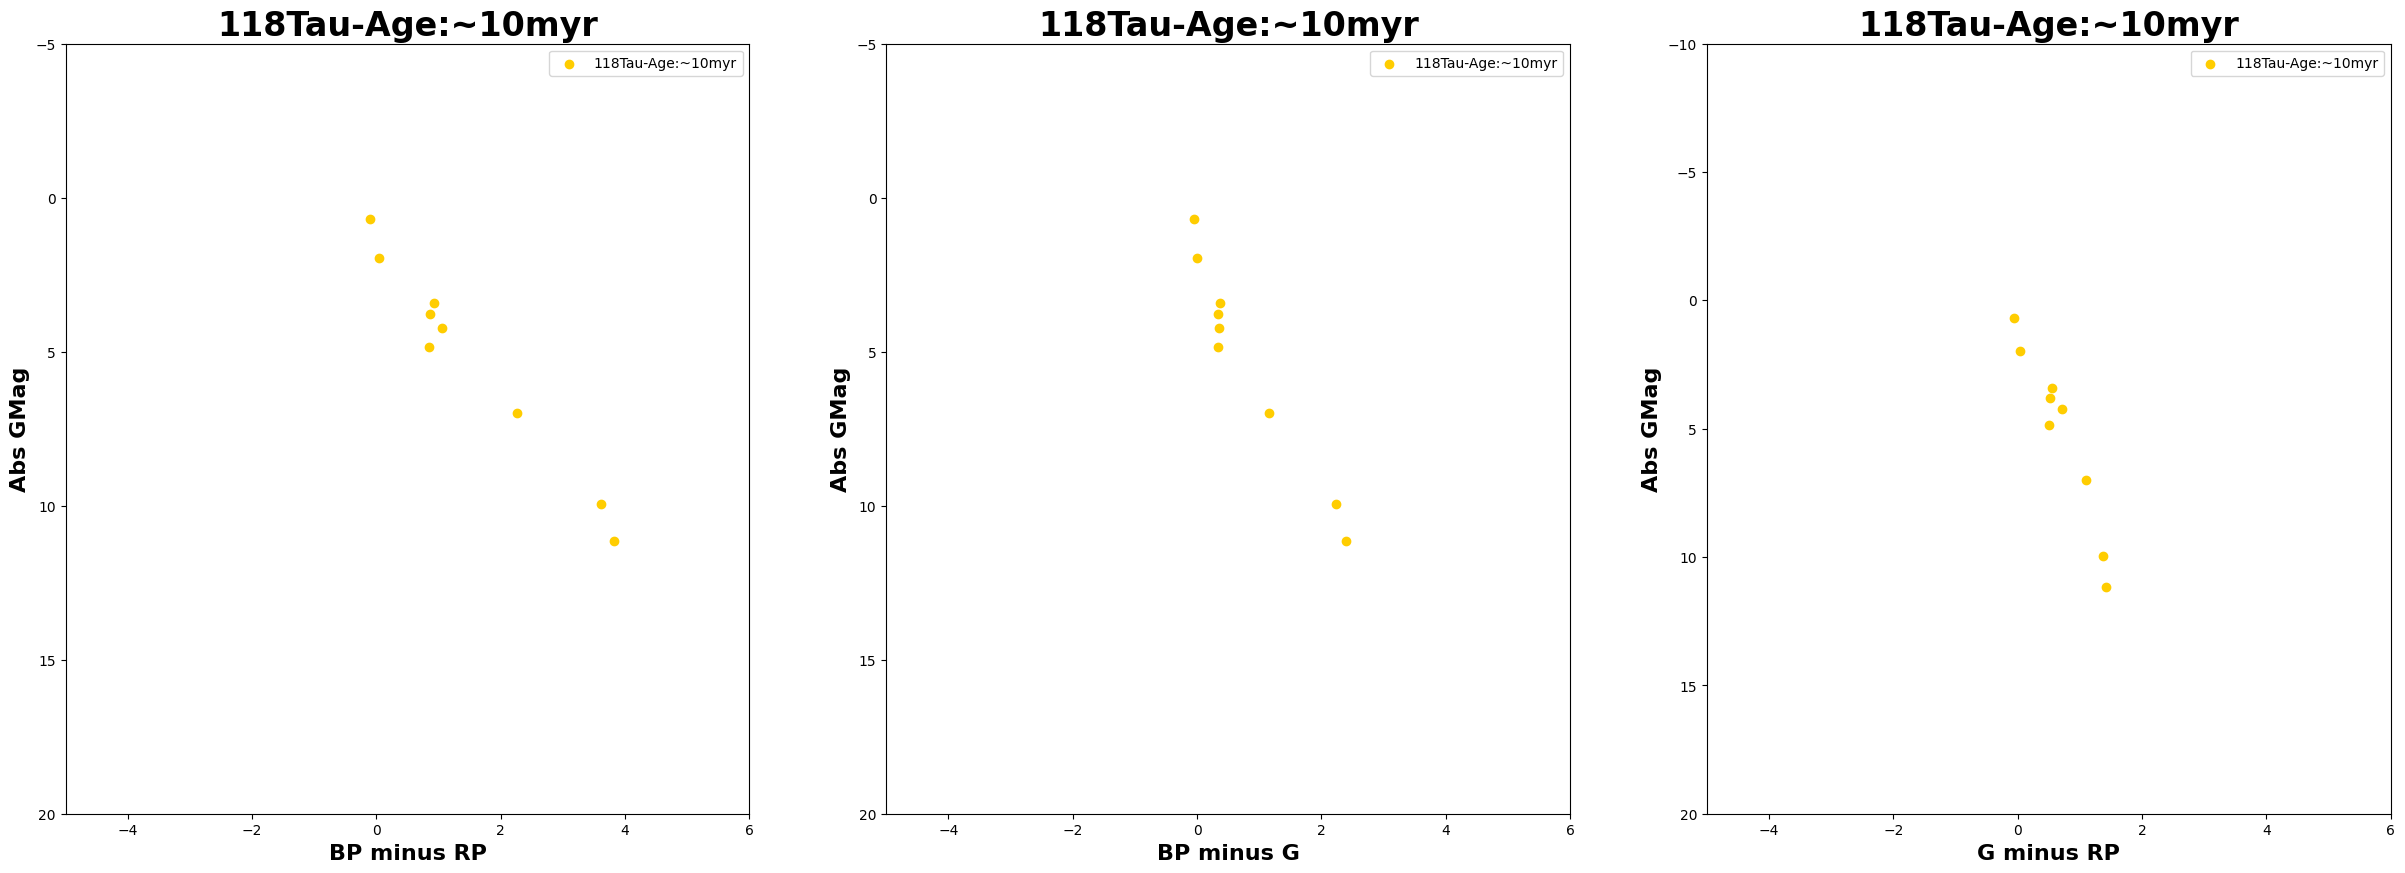

In [209]:
#sample method for all graphs
"""
514:523 are from DR2
68:77 are DR 3
"""

#assign index from 514-523 of BPminusRP into a list y_118Tau
BPminusRP_118TAU = BPminusRP[68:77]

#assign index 514-523 of gmag into a list in x_118tau
#118Tau columns - 514-523
unrefined_apparent_mag_118TAU = gmag[68:77]

#118Tau parallax, might have negative parallax
#function gets rid of negative parallax before the log calculation in calc_abs_mag
unrefined_parallax_118TAU = parallax[68:77]

#exclude_neg_parallax returns 2 arrays, one is apparent_mag, and two is parallax, they will have same indices, with negative parallax removed,
#if removed mag is also removed of the corresponding index of negative parallax
x_118TAU_BPminusRP, apparent_mag_118TAU, parallax_118TAU = exclude_neg_parallax(BPminusRP_118TAU, unrefined_apparent_mag_118TAU,unrefined_parallax_118TAU)

#calc abs mag for 118Tau
y_118TAU = calc_abs_mag(apparent_mag_118TAU, parallax_118TAU)

x_118TAU_BPminusG, y_118TAU = setting_colorminus_mag(BPminusG[68:77],gmag[68:77],parallax[68:77])
x_118TAU_GminusRP, y_118TAU = setting_colorminus_mag(GminusRP[68:77],gmag[68:77],parallax[68:77])

plot_three_figures(x_118TAU_BPminusRP, x_118TAU_BPminusG, x_118TAU_GminusRP, y_118TAU,"#FFCD00", "118Tau-Age:~10myr")

plt.show()

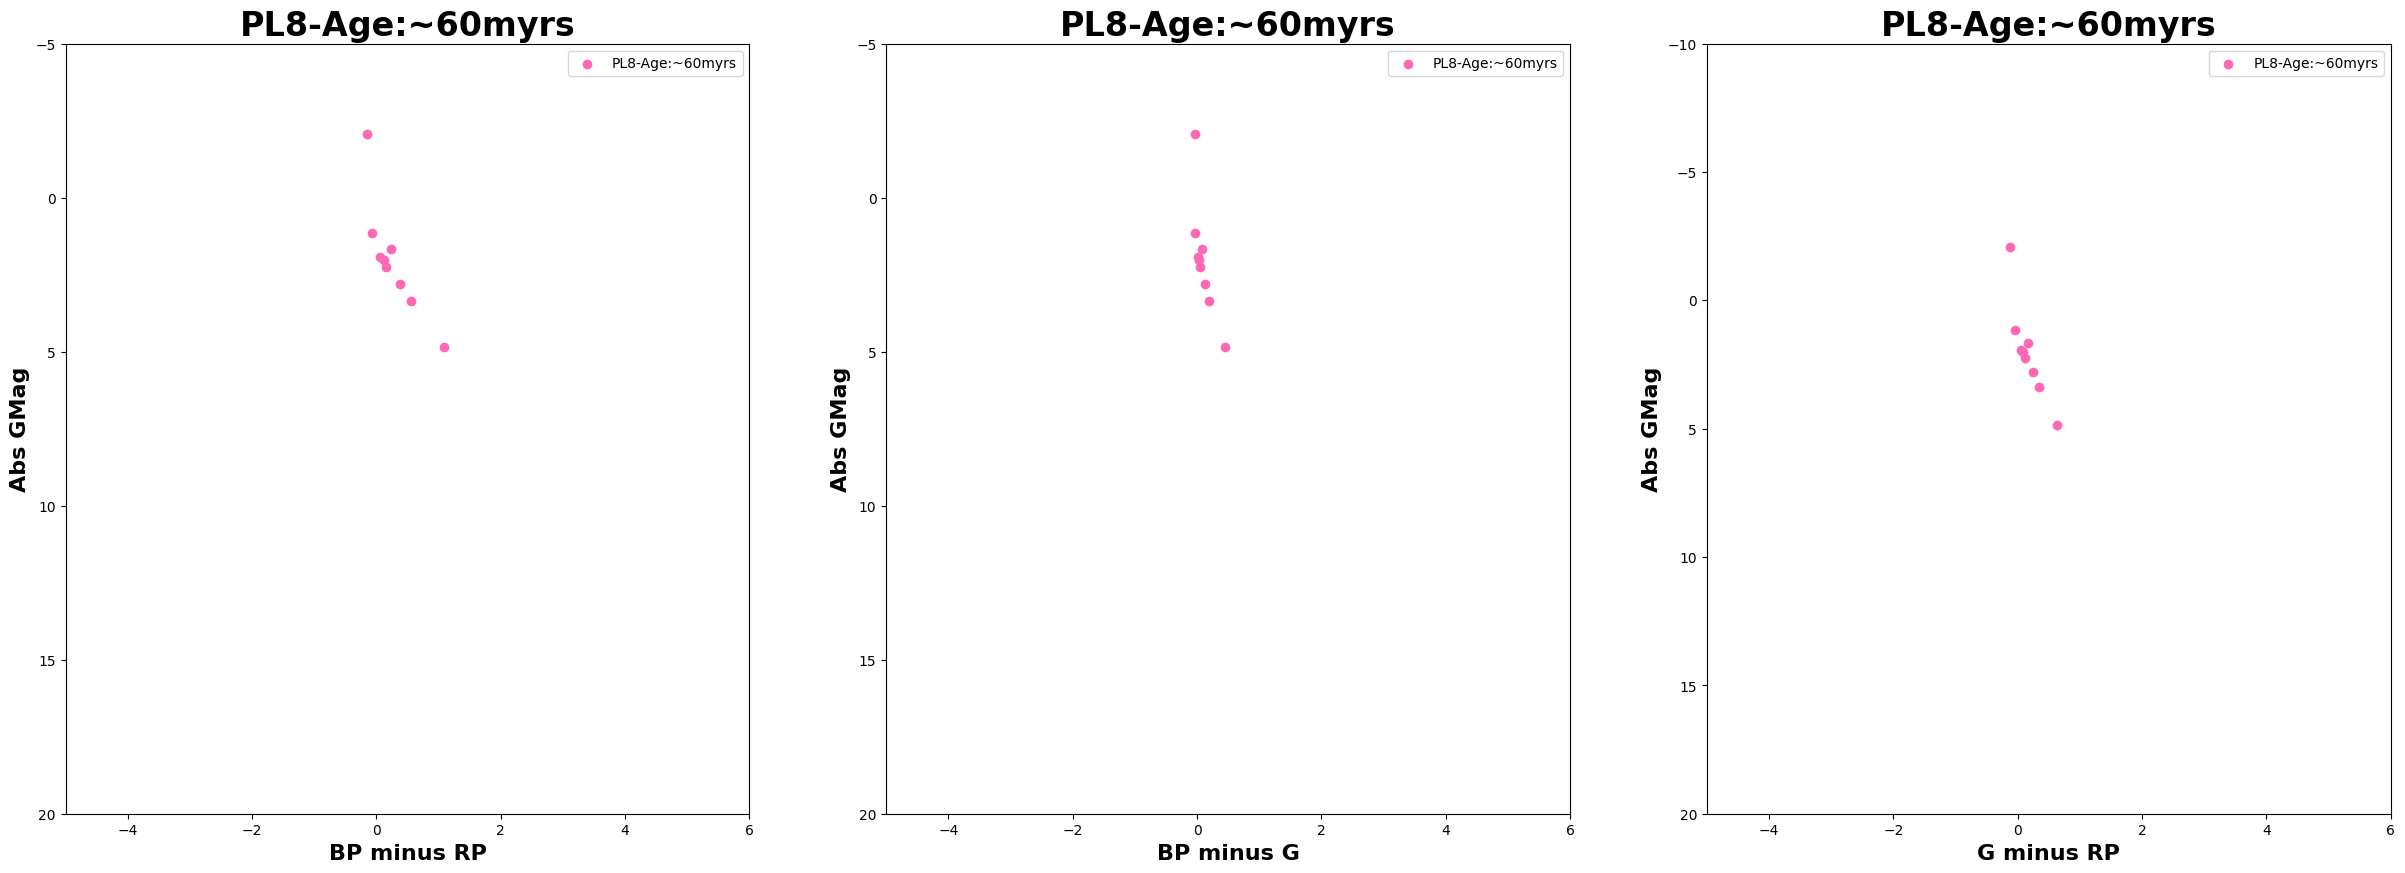

In [210]:
#PL8 columns    - 203:212

x_PL8_BPminusRP, y_PL8 = setting_colorminus_mag(BPminusRP[203:212],gmag[203:212],parallax[203:212])
x_PL8_BPminusG, y_PL8 = setting_colorminus_mag(BPminusG[203:212],gmag[203:212],parallax[203:212])
x_PL8_GminusRP, y_PL8 = setting_colorminus_mag(GminusRP[203:212],gmag[203:212],parallax[203:212])

plot_three_figures(x_PL8_BPminusRP, x_PL8_BPminusG, x_PL8_GminusRP, y_PL8,"hotpink", "PL8-Age:~60myrs")
plt.show()

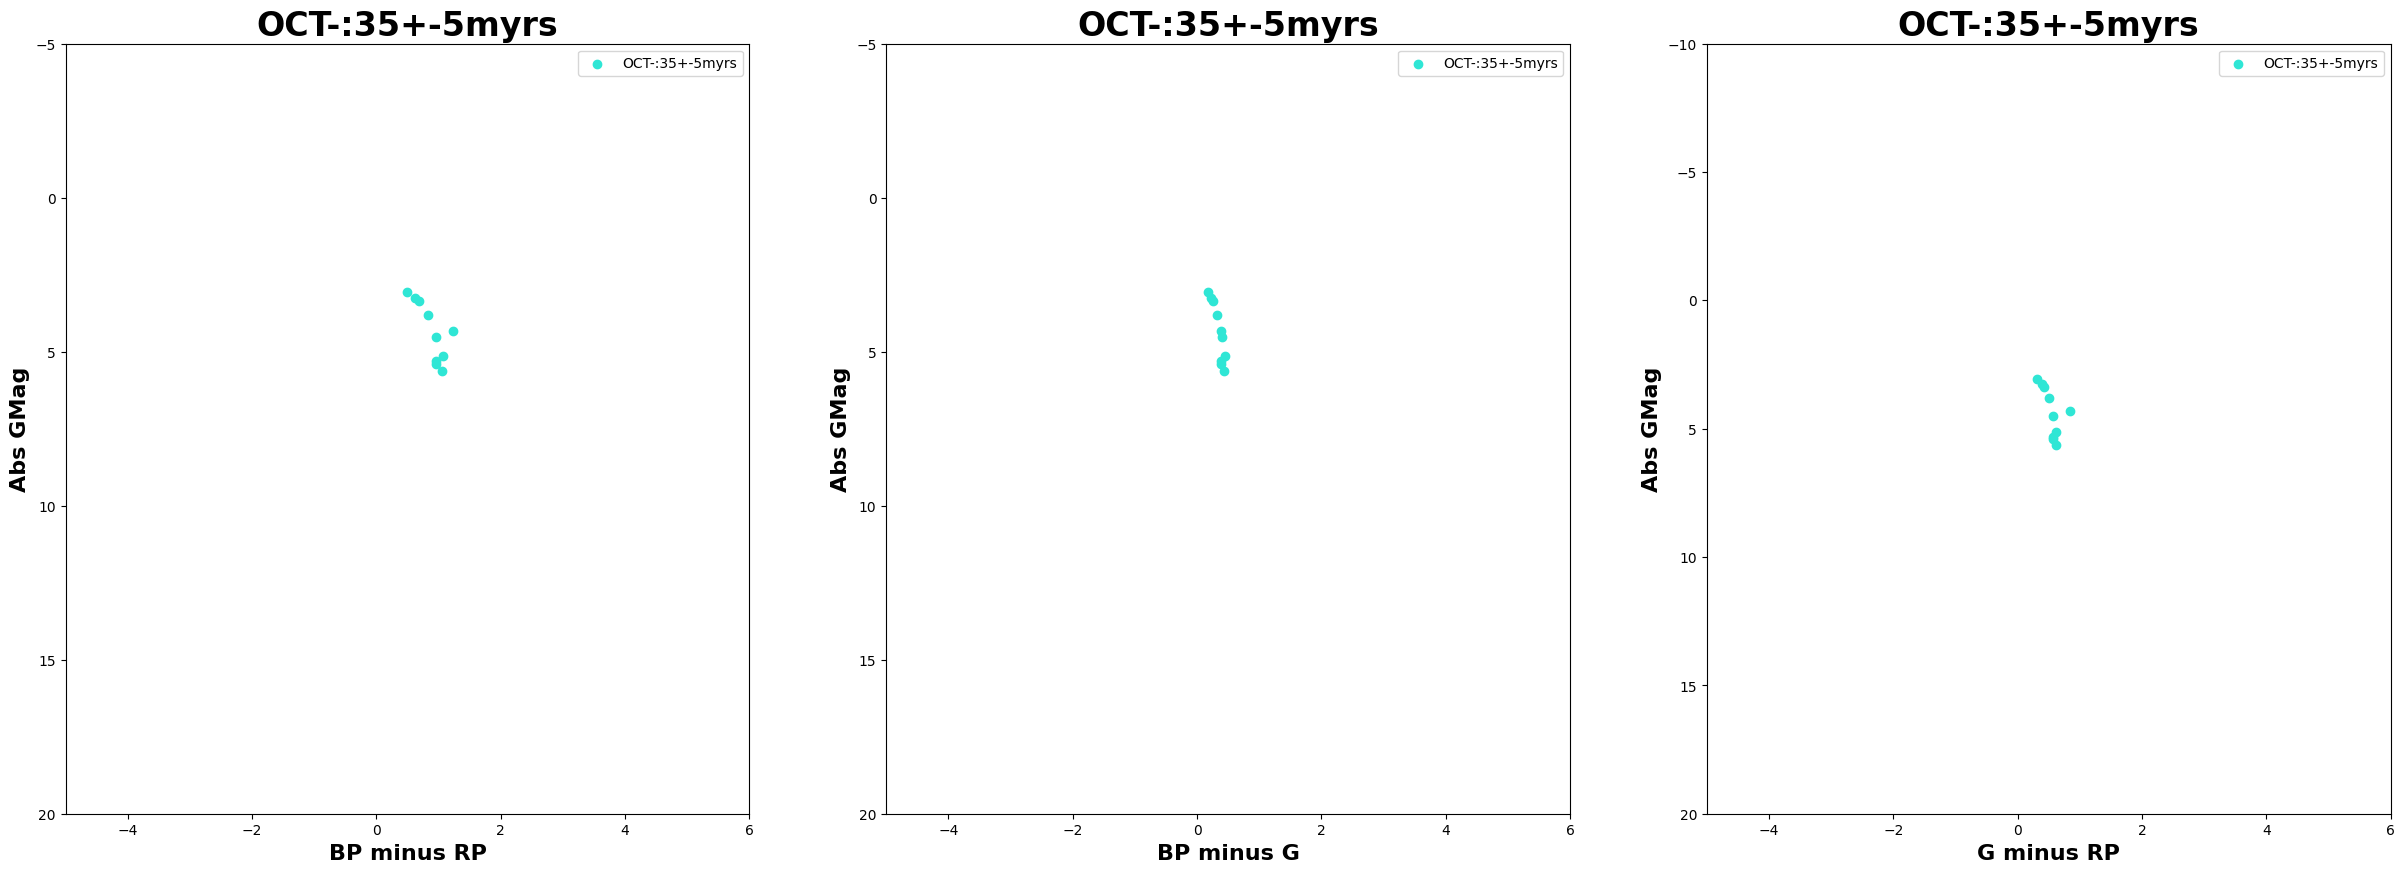

In [211]:
#OCT columns    - 78:88

unrefined_BPminusRP_OCT = BPminusRP[78:88]
unrefined_BPminusG_OCT = BPminusG[78:88]
unrefined_GminusRP_OCT = GminusRP[78:88]

unrefined_apparent_mag_OCT = gmag[78:88]
unrefined_parallax_OCT = parallax[78:88]

x_OCT_BPminusRP, y_OCT = setting_colorminus_mag(unrefined_BPminusRP_OCT, unrefined_apparent_mag_OCT, unrefined_parallax_OCT)
x_OCT_BPminusG, y_OCT = setting_colorminus_mag(unrefined_BPminusG_OCT, unrefined_apparent_mag_OCT, unrefined_parallax_OCT)
x_OCT_GminusRP, y_OCT = setting_colorminus_mag(unrefined_GminusRP_OCT, unrefined_apparent_mag_OCT, unrefined_parallax_OCT)

plot_three_figures(x_OCT_BPminusRP, x_OCT_BPminusG, x_OCT_GminusRP, y_OCT,"#2FE6D5", "OCT-:35+-5myrs")
plt.show()

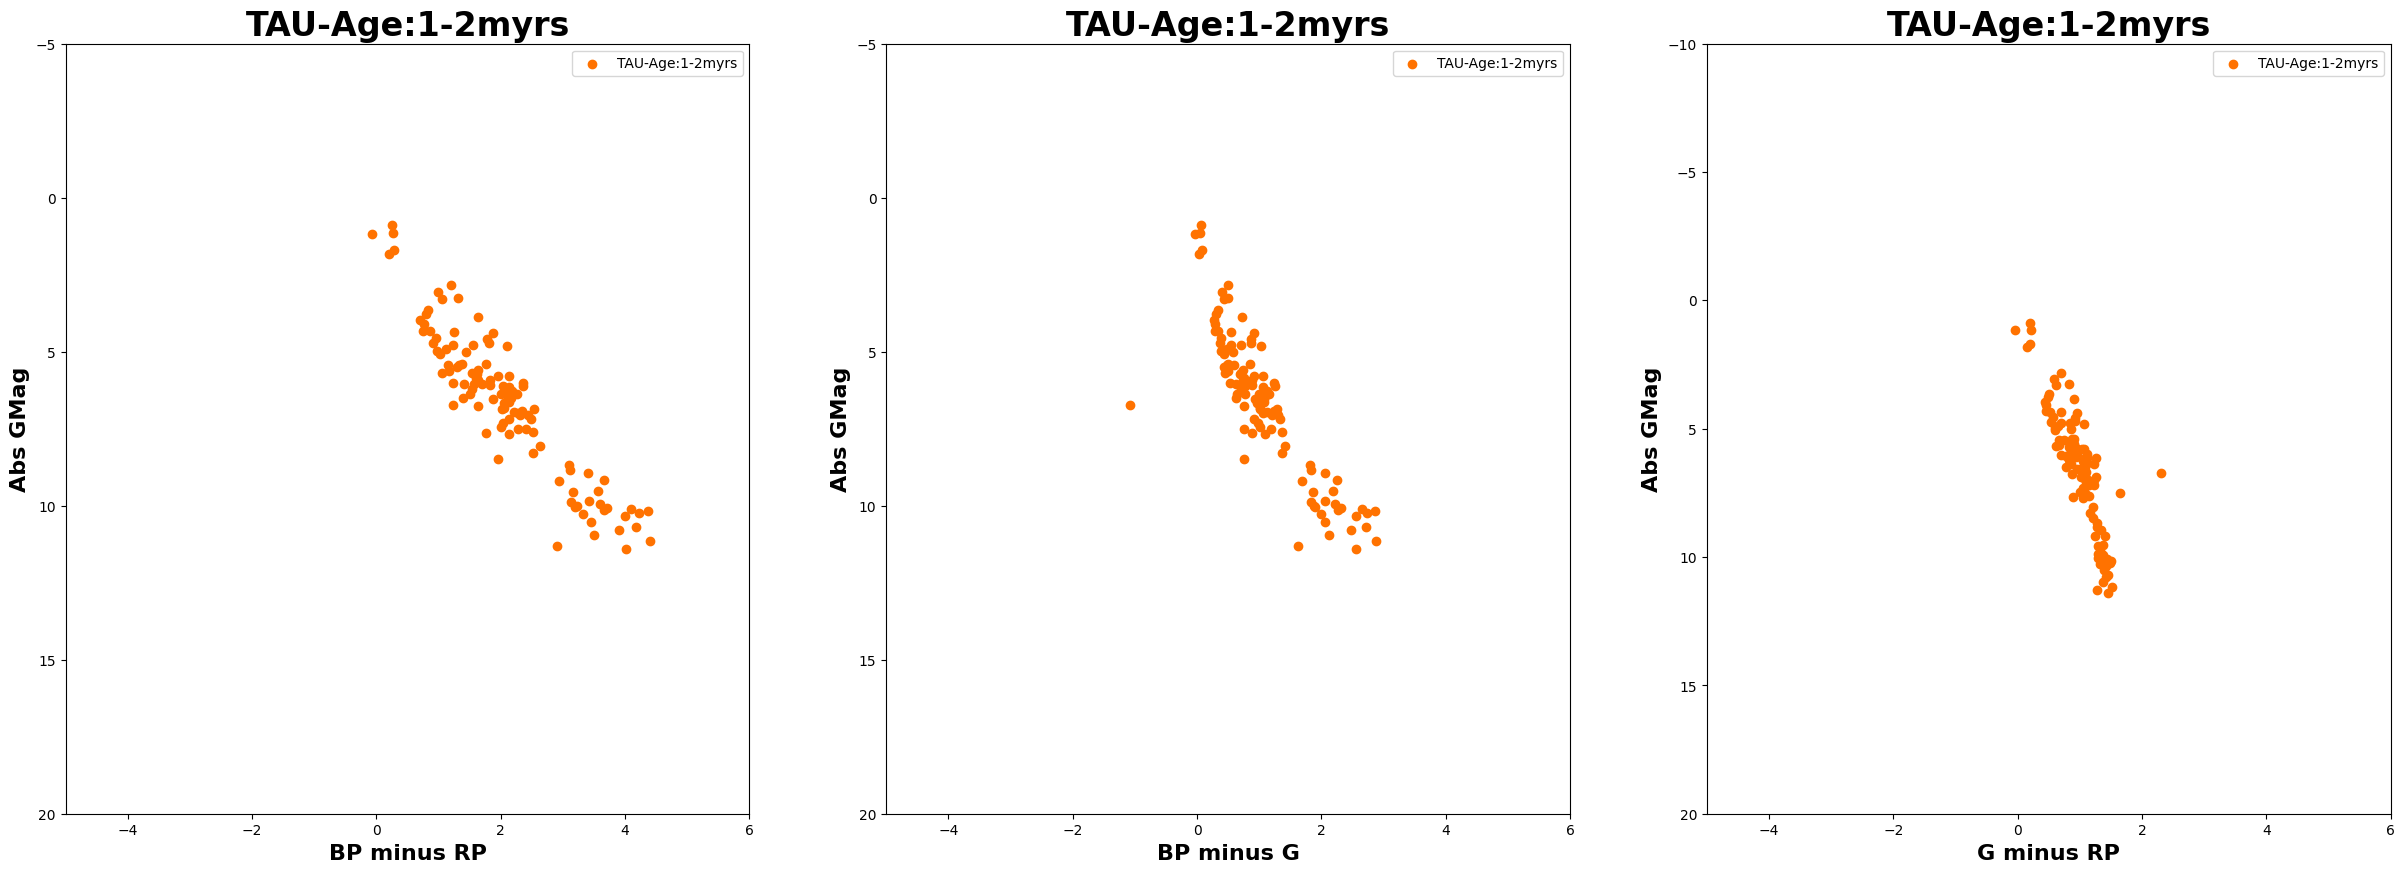

In [212]:
#TAU columns    - 89:202

x_TAU_BPminusRP, y_TAU = setting_colorminus_mag(BPminusRP[89:202], gmag[89:202], parallax[89:202])
x_TAU_BPminusG, y_TAU = setting_colorminus_mag(BPminusG[89:202], gmag[89:202], parallax[89:202])
x_TAU_GminusRP, y_TAU = setting_colorminus_mag(GminusRP[89:202], gmag[89:202], parallax[89:202])

plot_three_figures(x_TAU_BPminusRP, x_TAU_BPminusG, x_TAU_GminusRP, y_TAU,"#FF7200", "TAU-Age:1-2myrs")
plt.show()

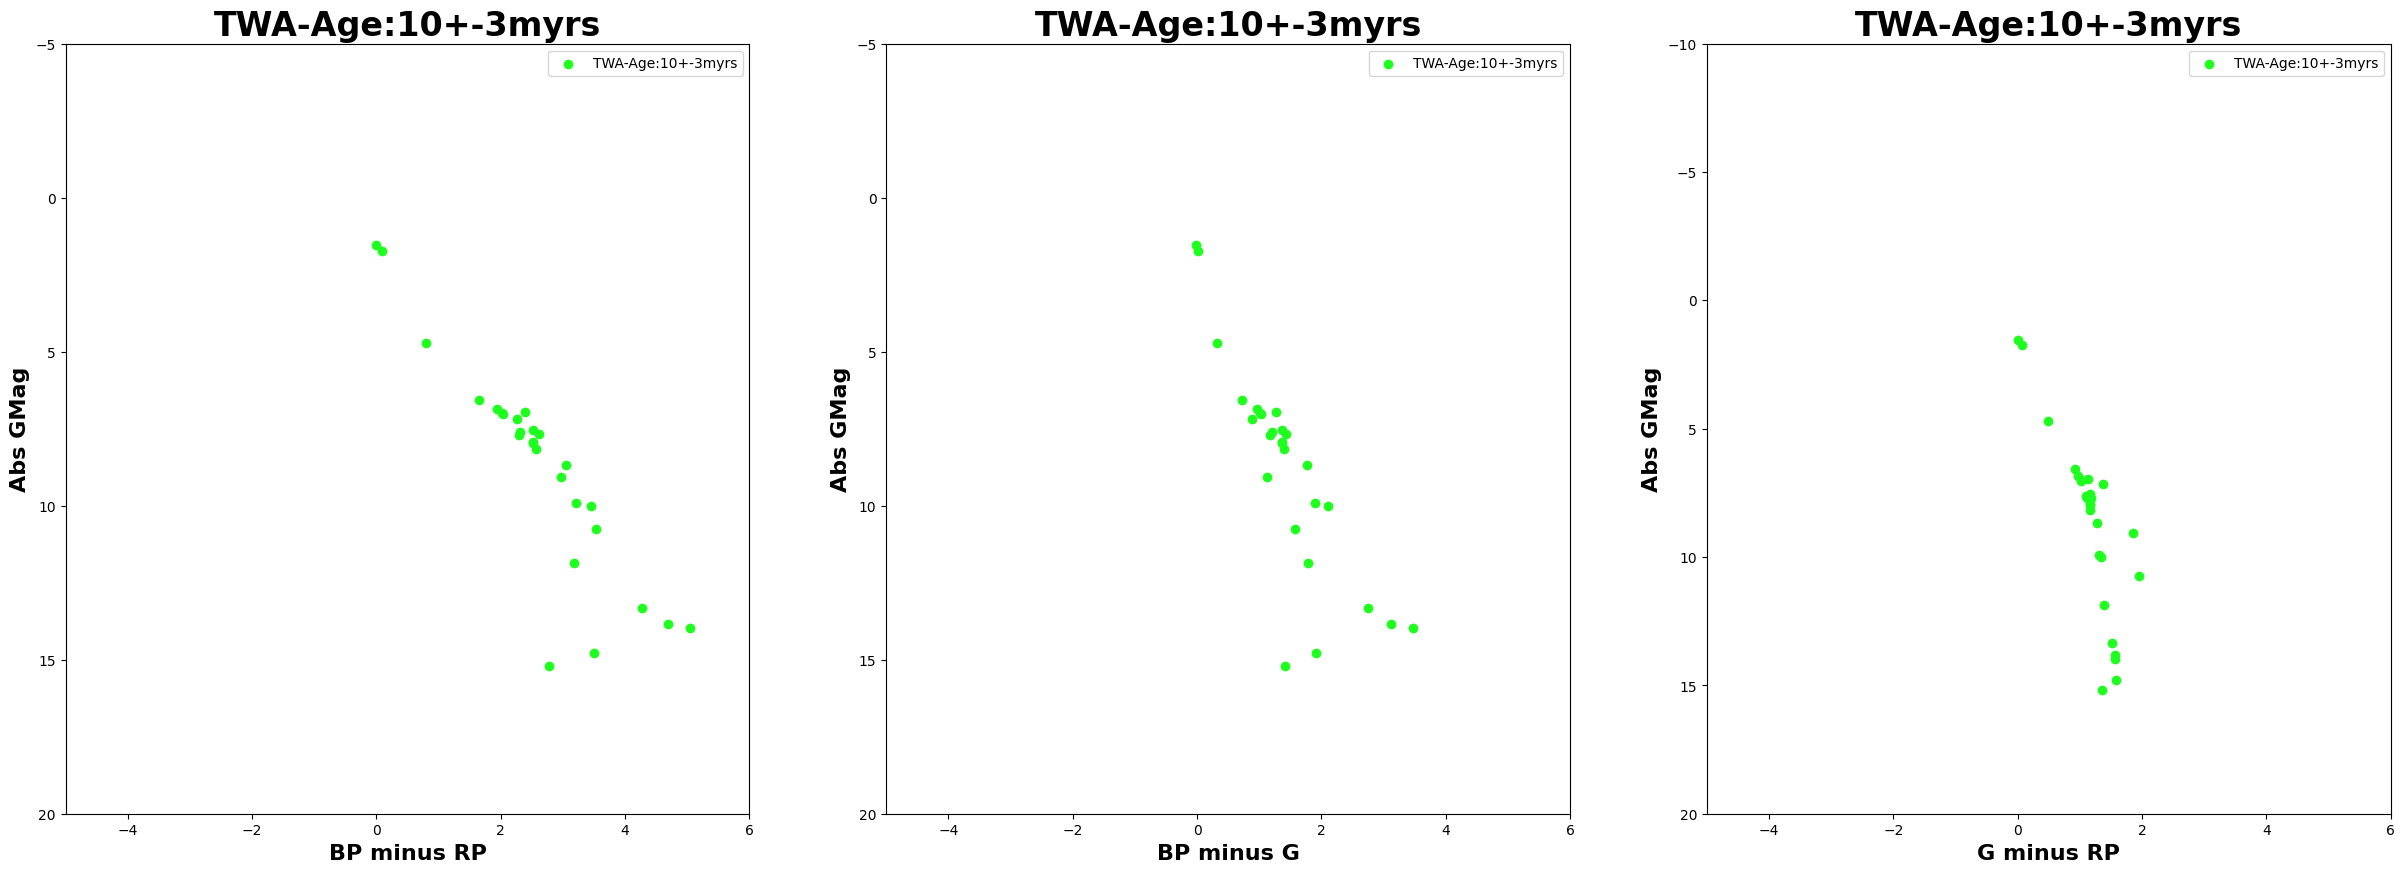

In [213]:
#TWA columns    - 0:27

x_TWA_BPminusRP, y_TWA = setting_colorminus_mag(BPminusRP[0:27], gmag[0:27],  parallax[0:27])
x_TWA_BPminusG, y_TWA = setting_colorminus_mag(BPminusG[0:27], gmag[0:27], parallax[0:27])
x_TWA_GminusRP, y_TWA = setting_colorminus_mag(GminusRP[0:27], gmag[0:27], parallax[0:27])

plot_three_figures(x_TWA_BPminusRP, x_TWA_BPminusG, x_TWA_GminusRP, y_TWA,"#1FFF1F", "TWA-Age:10+-3myrs")
plt.show()

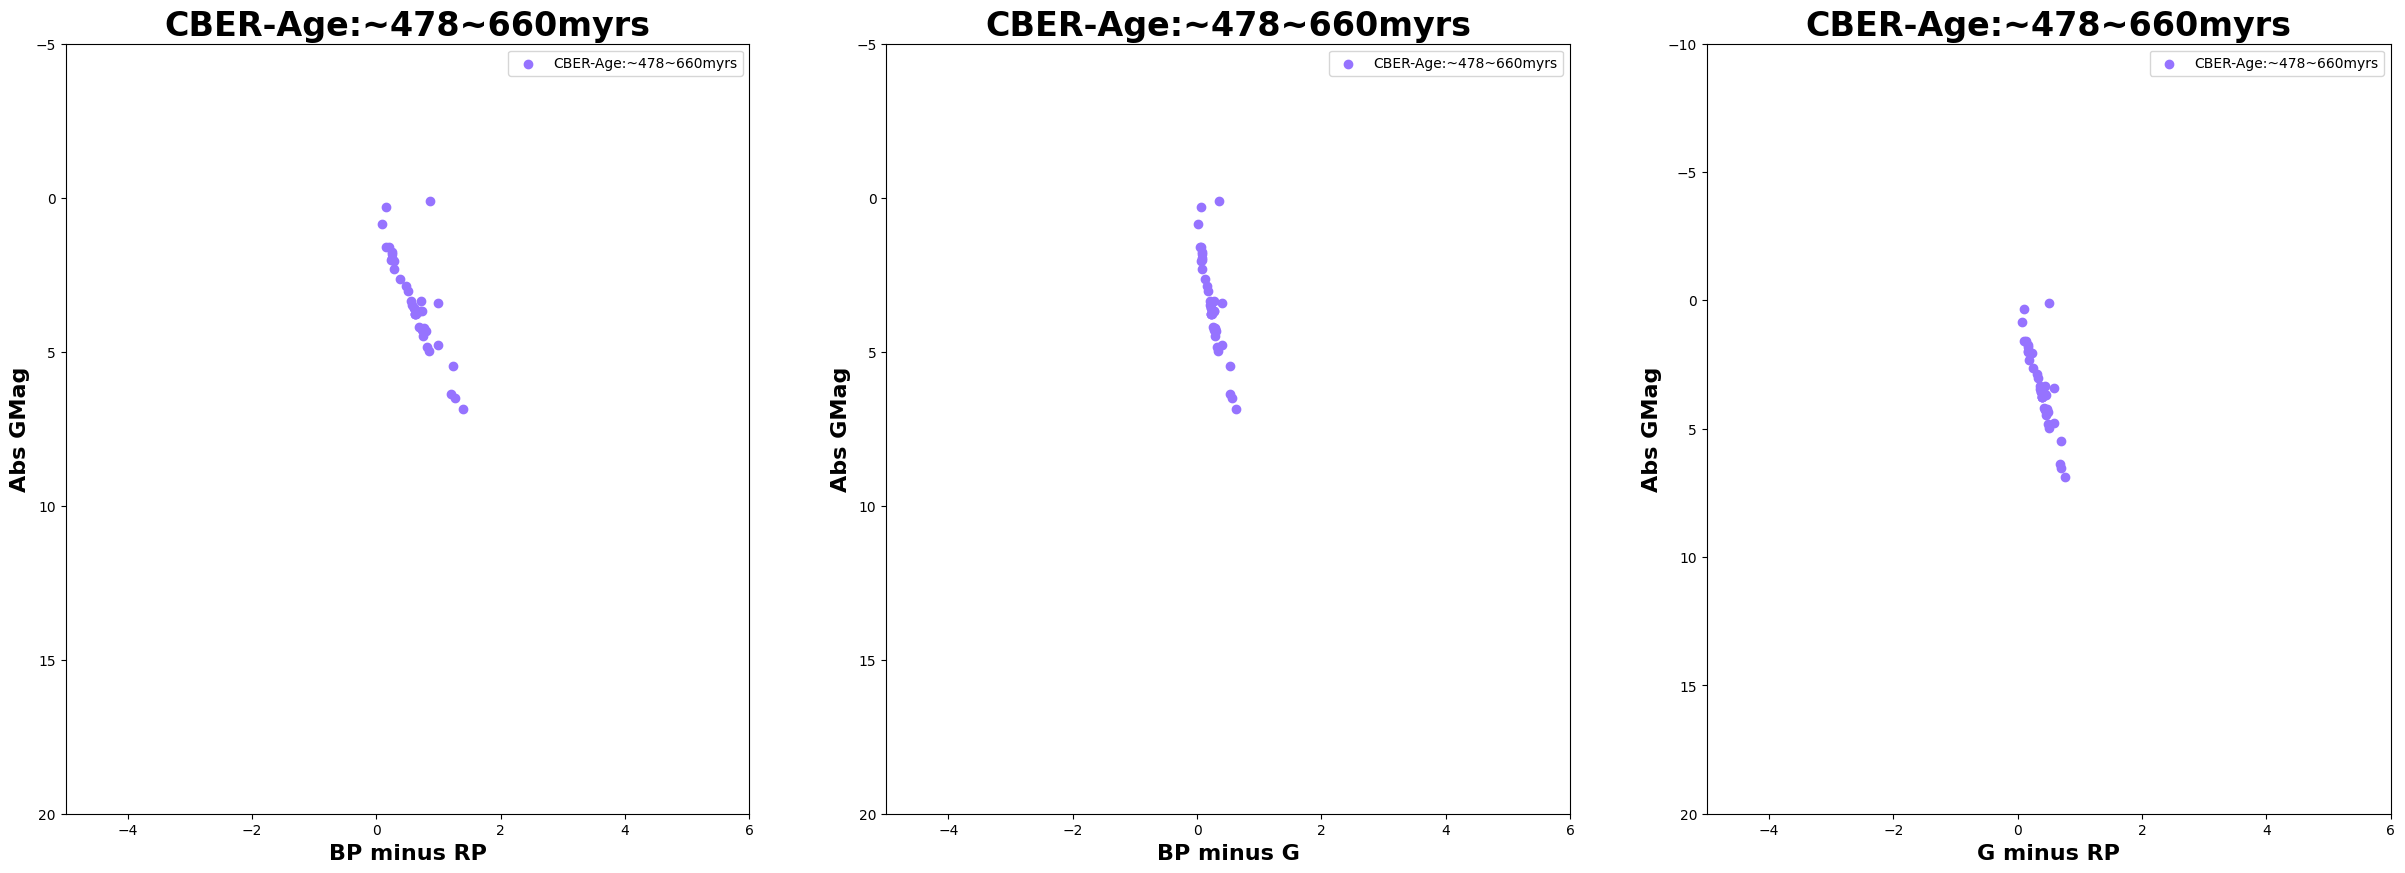

In [214]:
#CBER columns   - 28:67

x_CBER_BPminusRP, y_CBER = setting_colorminus_mag(BPminusRP[28:67],gmag[28:67],parallax[28:67])
x_CBER_BPminusG, y_CBER = setting_colorminus_mag(BPminusG[28:67],gmag[28:67],parallax[28:67])
x_CBER_GminusRP, y_CBER = setting_colorminus_mag(GminusRP[28:67],gmag[28:67],parallax[28:67])

plot_three_figures(x_CBER_BPminusRP, x_CBER_BPminusG, x_CBER_GminusRP, y_CBER,"#9673FF", "CBER-Age:~478~660myrs")
plt.show()

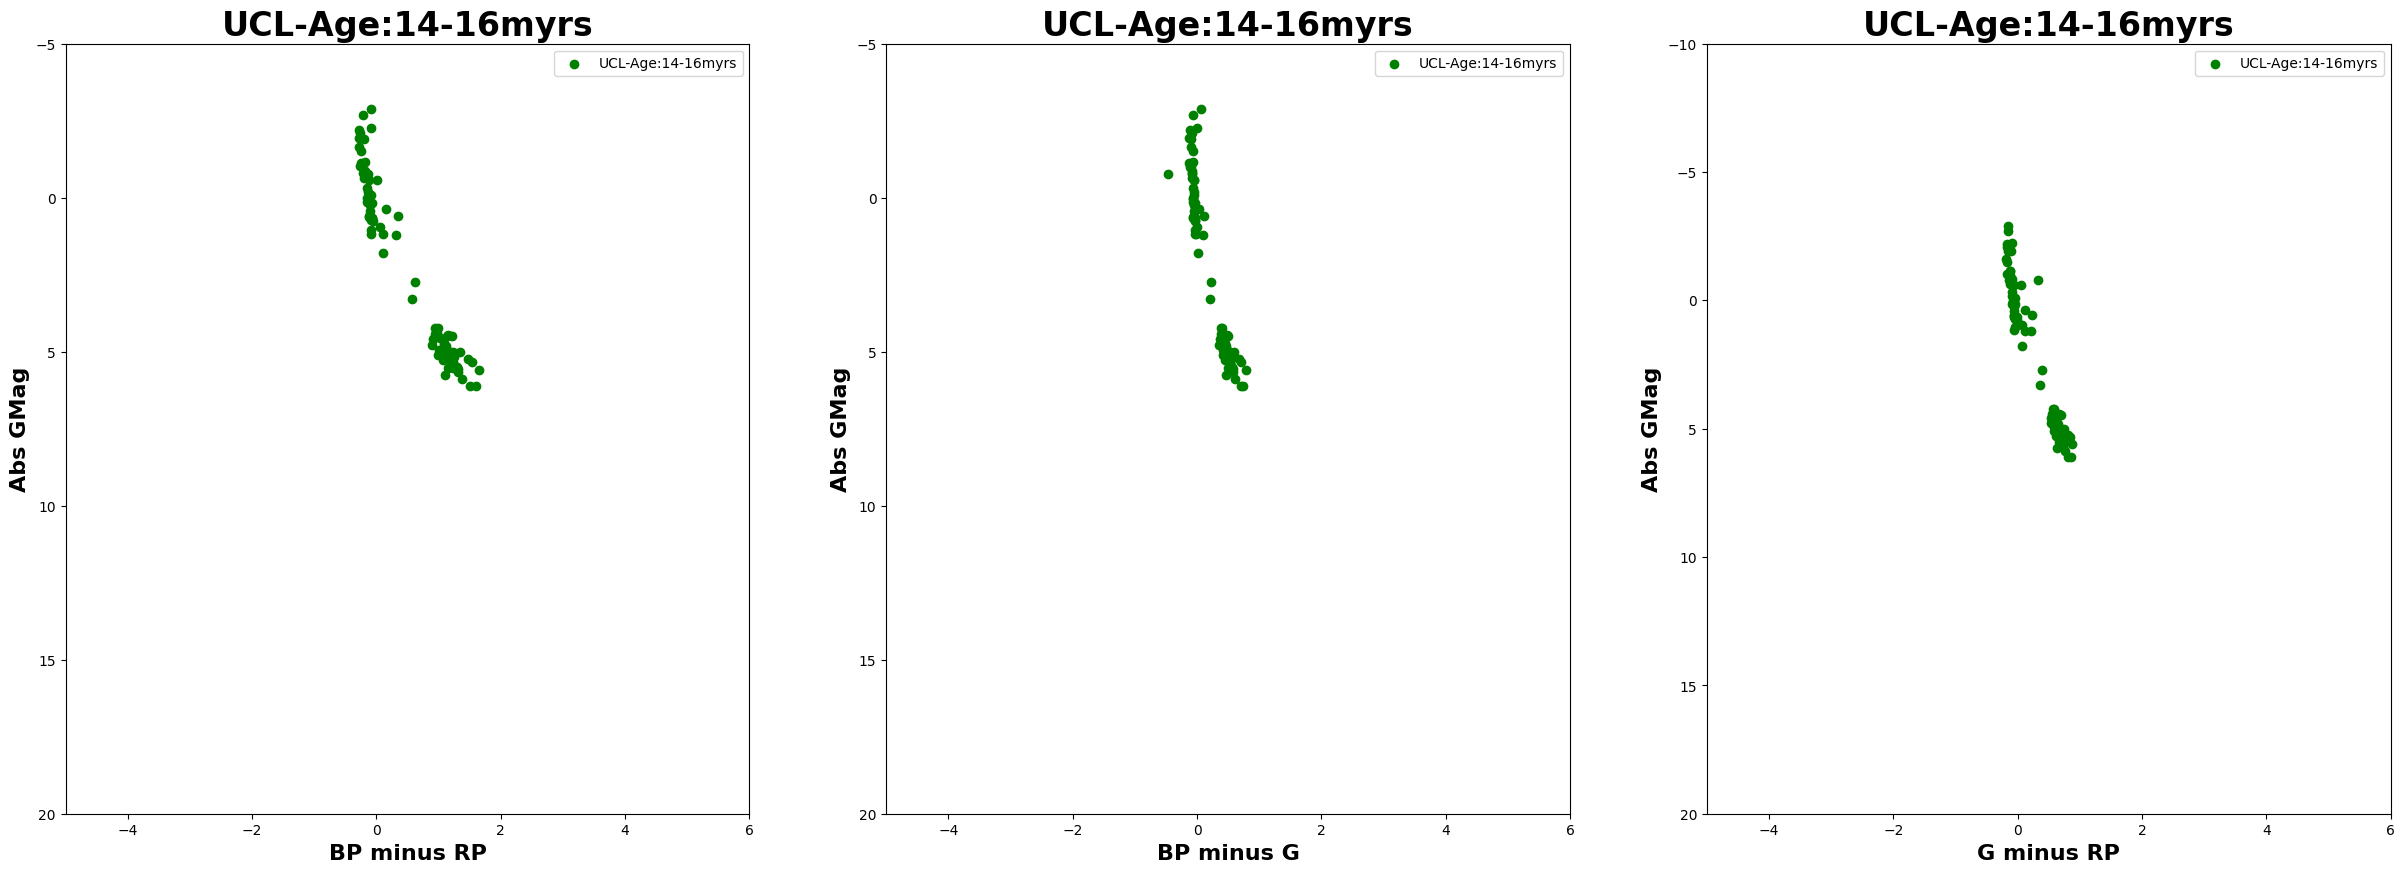

In [215]:
#UCL columns    - 213:309

x_UCL_BPminusRP, y_UCL = setting_colorminus_mag(BPminusRP[213:309],gmag[213:309],parallax[213:309])
x_UCL_BPminusG, y_UCL = setting_colorminus_mag(BPminusG[213:309],gmag[213:309],parallax[213:309])
x_UCL_GminusRP, y_UCL = setting_colorminus_mag(GminusRP[213:309],gmag[213:309],parallax[213:309])

plot_three_figures(x_UCL_BPminusRP, x_UCL_BPminusG, x_UCL_GminusRP, y_UCL,"g", "UCL-Age:14-16myrs")
plt.show()

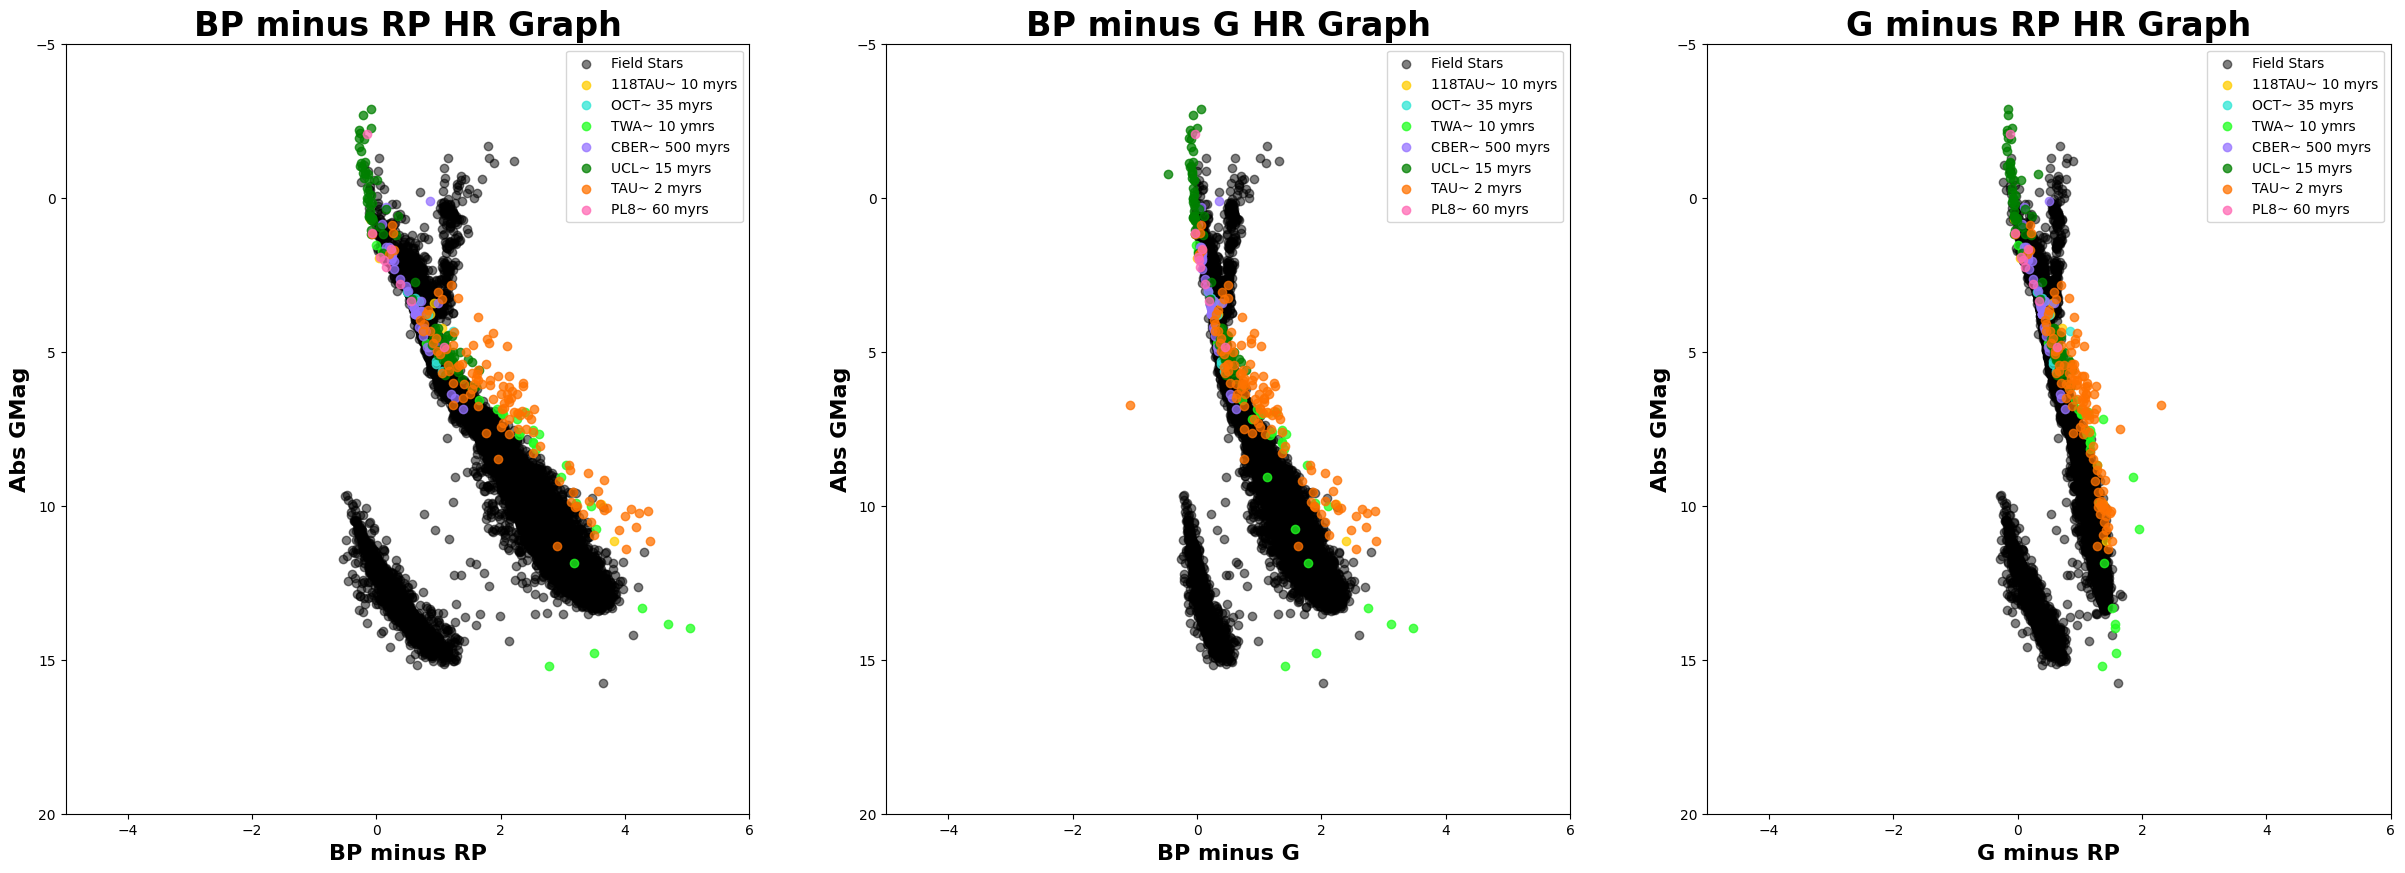

In [216]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)

#diagram of sample HR graph
plt.scatter(x_hr_BPmiusRP_data_2, y_hr_data_2, c="black", alpha = .5)

combined_plot_figure(x_118TAU_BPminusRP,y_118TAU,"#FFCD00","BP minus RP")
combined_plot_figure(x_OCT_BPminusRP,y_OCT,"#2FE6D5","BP minus RP")
combined_plot_figure(x_TWA_BPminusRP,y_TWA,"#1FFF1F","BP minus RP")
combined_plot_figure(x_CBER_BPminusRP,y_CBER,"#9673FF","BP minus RP")
combined_plot_figure(x_UCL_BPminusRP,y_UCL,"g","BP minus RP")
combined_plot_figure(x_TAU_BPminusRP, y_TAU, "#FF7200","BP minus RP")
combined_plot_figure(x_PL8_BPminusRP, y_PL8, "hotpink", "BP minus RP")

plt.legend(["Field Stars","118TAU~ 10 myrs","OCT~ 35 myrs","TWA~ 10 ymrs","CBER~ 500 myrs","UCL~ 15 myrs","TAU~ 2 myrs","PL8~ 60 myrs"])


plt.subplot(1,3,2)
#diagram of sample HR graph
plt.scatter(x_hr_BPmiusG_data_2, y_hr_data_2, c="black", alpha = .5)

combined_plot_figure(x_118TAU_BPminusG,y_118TAU,"#FFCD00","BP minus G")
combined_plot_figure(x_OCT_BPminusG,y_OCT,"#2FE6D5","BP minus G")
combined_plot_figure(x_TWA_BPminusG,y_TWA,"#1FFF1F","BP minus G")
combined_plot_figure(x_CBER_BPminusG,y_CBER,"#9673FF","BP minus G")
combined_plot_figure(x_UCL_BPminusG,y_UCL,"g","BP minus G")
combined_plot_figure(x_TAU_BPminusG, y_TAU, "#FF7200","BP minus G")
combined_plot_figure(x_PL8_BPminusG, y_PL8, "hotpink", "BP minus G")

plt.legend(["Field Stars","118TAU~ 10 myrs","OCT~ 35 myrs","TWA~ 10 ymrs","CBER~ 500 myrs","UCL~ 15 myrs","TAU~ 2 myrs","PL8~ 60 myrs"])


plt.subplot(1,3,3)
#diagram of sample HR graph
plt.scatter(x_hr_GmiusRP_data_2, y_hr_data_2, c="black", alpha = .5)

combined_plot_figure(x_118TAU_GminusRP,y_118TAU,"#FFCD00","G minus RP")
combined_plot_figure(x_OCT_GminusRP,y_OCT,"#2FE6D5","G minus RP")
combined_plot_figure(x_TWA_GminusRP,y_TWA,"#1FFF1F","G minus RP")
combined_plot_figure(x_CBER_GminusRP,y_CBER,"#9673FF","G minus RP")
combined_plot_figure(x_UCL_GminusRP,y_UCL,"g","G minus RP")
combined_plot_figure(x_TAU_GminusRP, y_TAU, "#FF7200","G minus RP")
combined_plot_figure(x_PL8_GminusRP, y_PL8, "hotpink", "G minus RP")

plt.legend(["Field Stars","118TAU~ 10 myrs","OCT~ 35 myrs","TWA~ 10 ymrs","CBER~ 500 myrs","UCL~ 15 myrs","TAU~ 2 myrs","PL8~ 60 myrs"])

plt.show()

In [217]:
#[0, -1],..[+2, -1]..,[+2,0]
ra = ymg_data["ra"]
dec = ymg_data["dec"]
x = ymg_data["x"]
y = ymg_data["y"]
z = ymg_data["z"]
u = ymg_data["u"]
v = ymg_data["v"]
w = ymg_data["w"]

#TWA 0:26
#RA, DEC, xyz,uvw
ra_TWA = ra[0:26]
dec_TWA = dec[0:26]
x_TWA_kin = x[0:26]
y_TWA_kin = y[0:26]
z_TWA_kin = z[0:26]
u_TWA_kin = u[0:26]
v_TWA_kin = v[0:26]
w_TWA_kin = w[0:26]

#CBER 26:66
z_CBER_unfiltered = z[26:66]
z_CBER_indices_array = np.where(z_CBER_unfiltered < 100)
z_CBER_kin = z_CBER_unfiltered[z_CBER_indices_array]

x_CBER_unfiltered = x[26:66]
x_CBER_kin = x_CBER_unfiltered[z_CBER_indices_array]

y_CBER_unfiltered = y[26:66]
y_CBER_kin = y_CBER_unfiltered[z_CBER_indices_array]

u_CBER_unfiltered = u[26:66]
u_CBER_kin = u_CBER_unfiltered[z_CBER_indices_array]

v_CBER_unfiltered = v[26:66]
v_CBER_kin = v_CBER_unfiltered[z_CBER_indices_array]

w_CBER_unfiltered = w[26:66]
w_CBER_kin = w_CBER_unfiltered[z_CBER_indices_array]

ra_CBER_unfiltered = ra[26:66]
ra_CBER_kin = ra_CBER_unfiltered[z_CBER_indices_array]

dec_CBER_unfiltered = dec[26:66]
dec_CBER_kin = dec_CBER_unfiltered[z_CBER_indices_array]

#118TAU 66:76
ra_118TAU = ra[66:76]
dec_118TAU = dec[66:76]
x_118TAU_kin = x[66:76]
y_118TAU_kin = y[66:76]
z_118TAU_kin = z[66:76]
u_118TAU_kin = u[66:76]
v_118TAU_kin = v[66:76]
w_118TAU_kin = w[66:76]

#OCT 76:87
ra_OCT = ra[76:87]
dec_OCT = dec[76:87]
x_OCT_kin = x[76:87]
y_OCT_kin = y[76:87]
z_OCT_kin = z[76:87]
u_OCT_kin = u[76:87]
v_OCT_kin = v[76:87]
w_OCT_kin = w[76:87]

#TAU 87:201
#use np.where for TAU because some values of x are very large, messing up the whole std scale
x_TAU_unfiltered = x[87:201]
x_TAU_indices_array = np.where(x_TAU_unfiltered > -1000)
x_TAU_kin = x_TAU_unfiltered[x_TAU_indices_array]

y_TAU_unfiltered = y[87:201]
y_TAU_kin = y_TAU_unfiltered[x_TAU_indices_array]

z_TAU_unfiltered = z[87:201]
z_TAU_kin = z_TAU_unfiltered[x_TAU_indices_array]

u_TAU_unfiltered = u[87:201]
u_TAU_kin = u_TAU_unfiltered[x_TAU_indices_array]

v_TAU_unfiltered = v[87:201]
v_TAU_kin = v_TAU_unfiltered[x_TAU_indices_array]

w_TAU_unfiltered = w[87:201]
w_TAU_kin = w_TAU_unfiltered[x_TAU_indices_array]

ra_TAU_unfiltered = ra[87:201]
ra_TAU = ra_TAU_unfiltered[x_TAU_indices_array]

dec_TAU_unfiltered = dec[87:201]
dec_TAU = dec_TAU_unfiltered[x_TAU_indices_array]

#PL8 201:211
ra_PL8 = ra[201:211]
dec_PL8 = dec[201:211]
x_PL8_kin = x[201:211]
y_PL8_kin = y[201:211]
z_PL8_kin = z[201:211]
u_PL8_kin = u[201:211]
v_PL8_kin = v[201:211]
v_UCL_kin = v[211:308]
w_PL8_kin = w[201:211]

#UCL 211:308
ra_UCL = ra[211:308]
dec_UCL = dec[211:308]
x_UCL_kin = x[211:308]
y_UCL_kin = y[211:308]
z_UCL_kin = z[211:308]
u_UCL_kin = u[211:308]
v_UCL_kin = v[211:308]
w_UCL_kin = w[211:308]

In [218]:
#candidates
x_candidates = candidates["x"]
y_candidates = candidates["y"]
z_candidates = candidates["z"]
u_candidates = candidates["u"]
v_candidates = candidates["v"]
w_candidates = candidates["w"]

rp_candidates = candidates["rp"]
bp_candidates = candidates["bp"]

unrefined_gmag_candidates = candidates["gmag"]
unrefined_parallax_candidates = candidates["parallax"]
unrefined_BPminusRP_candidates = bp_candidates - rp_candidates

x_BPminusRP_candidates_hr, y_candidates_hr = setting_colorminus_mag(unrefined_BPminusRP_candidates, unrefined_gmag_candidates, unrefined_parallax_candidates)



def ra_dec_candidates(x,y,z,u,v,w):
  rightx3 = np.nanmean(x) + 3*np.nanstd(x)
  righty3 = np.nanmean(y) + 3*np.nanstd(y)
  rightz3 = np.nanmean(z) + 3*np.nanstd(z)
  rightu3 = np.nanmean(u) + 3*np.nanstd(u)
  rightv3 = np.nanmean(v) + 3*np.nanstd(v)
  rightw3 = np.nanmean(w) + 3*np.nanstd(w)

  leftx3 = np.nanmean(x) - 3*np.nanstd(x)
  lefty3 = np.nanmean(y) - 3*np.nanstd(y)
  leftz3 = np.nanmean(z) - 3*np.nanstd(z)
  leftu3 = np.nanmean(u) - 3*np.nanstd(u)
  leftv3 = np.nanmean(v) - 3*np.nanstd(v)
  leftw3 = np.nanmean(w) - 3*np.nanstd(w)

  candidates_indices = np.where(
      ((x_candidates>leftx3)&(x_candidates<rightx3))&((y_candidates>lefty3)&(y_candidates<righty3))&((z_candidates>leftz3)&(z_candidates<rightz3))
      &((u_candidates>leftu3)&(u_candidates<rightu3))&((v_candidates>leftv3)&(v_candidates<rightv3))&((w_candidates>leftw3)&(w_candidates<rightw3))
      )

  rp_confirmed_cc = rp_candidates[candidates_indices]
  bp_confirmed_cc = bp_candidates[candidates_indices]

  unrefined_BPminusRP_cc = bp_confirmed_cc - rp_confirmed_cc

  unrefined_gmag_cc = unrefined_gmag_candidates[candidates_indices]
  unrefined_parallax_cc = unrefined_parallax_candidates[candidates_indices]

  x_BPminusRP_cc, y_cc_hr = setting_colorminus_mag(unrefined_BPminusRP_cc, unrefined_gmag_cc, unrefined_parallax_cc)

  return x_BPminusRP_cc, y_cc_hr

def hr_with_candidates():
  x_BPminusRP_cc_118TAU_hr, y_cc_118TAU_hr = ra_dec_candidates(x_118TAU_kin,y_118TAU_kin,z_118TAU_kin,u_118TAU_kin,v_118TAU_kin,w_118TAU_kin)
  x_BPminusRP_cc_CBER_hr, y_cc_CBER_hr = ra_dec_candidates(x_CBER_kin,y_CBER_kin,z_CBER_kin,u_CBER_kin,v_CBER_kin,w_CBER_kin)
  x_BPminusRP_cc_PL8_hr, y_cc_PL8_hr = ra_dec_candidates(x_PL8_kin,y_PL8_kin,z_PL8_kin,u_PL8_kin,v_PL8_kin,w_PL8_kin)
  x_BPminusRP_cc_TWA_hr, y_cc_TWA_hr = ra_dec_candidates(x_TWA_kin,y_TWA_kin,z_TWA_kin,u_TWA_kin,v_TWA_kin,w_TWA_kin)
  x_BPminusRP_cc_TAU_hr, y_cc_TAU_hr = ra_dec_candidates(x_TAU_kin,y_TAU_kin,z_TAU_kin,u_TAU_kin,v_TAU_kin,w_TAU_kin)
  x_BPminusRP_cc_UCL_hr, y_cc_UCL_hr = ra_dec_candidates(x_UCL_kin,y_UCL_kin,z_UCL_kin,u_UCL_kin,v_UCL_kin,w_UCL_kin)
  x_BPminusRP_cc_OCT_hr, y_cc_OCT_hr = ra_dec_candidates(x_OCT_kin,y_OCT_kin,z_OCT_kin,u_OCT_kin,v_OCT_kin,w_OCT_kin)

  """  x_BPminusRP_cc_combined_hr = []

  x_BPminusRP_cc_combined_hr.append(x_BPminusRP_cc_118TAU_hr)
  x_BPminusRP_cc_combined_hr.append(x_BPminusRP_cc_CBER_hr)
  x_BPminusRP_cc_combined_hr.append(x_BPminusRP_cc_PL8_hr)
  x_BPminusRP_cc_combined_hr.append(x_BPminusRP_cc_TWA_hr)
  x_BPminusRP_cc_combined_hr.append(x_BPminusRP_cc_TAU_hr)
  x_BPminusRP_cc_combined_hr.append(x_BPminusRP_cc_UCL_hr)
  x_BPminusRP_cc_combined_hr.append(x_BPminusRP_cc_OCT_hr)

  x_BPminusRP_m_combined_hr = []
  x_BPminusRP_m_combined_hr.append(x_118TAU_BPminusRP)
  x_BPminusRP_m_combined_hr.append(x_OCT_BPminusRP)
  x_BPminusRP_m_combined_hr.append(x_TWA_BPminusRP)
  x_BPminusRP_m_combined_hr.append(x_CBER_BPminusRP)
  x_BPminusRP_m_combined_hr.append(x_UCL_BPminusRP)
  x_BPminusRP_m_combined_hr.append(x_TAU_BPminusRP)
  x_BPminusRP_m_combined_hr.append(x_PL8_BPminusRP)

  y_cc_combined_hr = []
  y_cc_combined_hr.append(y_cc_118TAU_hr)
  y_cc_combined_hr.append(y_cc_CBER_hr)
  y_cc_combined_hr.append(y_cc_PL8_hr)
  y_cc_combined_hr.append(y_cc_TWA_hr)
  y_cc_combined_hr.append(y_cc_TAU_hr)
  y_cc_combined_hr.append(y_cc_UCL_hr)
  y_cc_combined_hr.append(y_cc_OCT_hr)

  y_m_combined_hr = []
  y_m_combined_hr.append(y_118TAU)
  y_m_combined_hr.append(y_OCT)
  y_m_combined_hr.append(y_TWA)
  y_m_combined_hr.append(y_CBER)
  y_m_combined_hr.append(y_UCL)
  y_m_combined_hr.append(y_TAU)
  y_m_combined_hr.append(y_PL8)"""
  x_BPminusRP_cc_combined_hr = np.concatenate((x_BPminusRP_cc_118TAU_hr,x_BPminusRP_cc_CBER_hr,x_BPminusRP_cc_PL8_hr,x_BPminusRP_cc_TWA_hr,x_BPminusRP_cc_TAU_hr,x_BPminusRP_cc_UCL_hr,x_BPminusRP_cc_OCT_hr))
  x_BPminusRP_m_combined_hr = np.concatenate((x_118TAU_BPminusRP,x_OCT_BPminusRP,x_TWA_BPminusRP,x_CBER_BPminusRP,x_UCL_BPminusRP,x_TAU_BPminusRP,x_PL8_BPminusRP))

  #x_BPminusRP_cc_combined_hr = x_BPminusRP_cc_118TAU_hr + x_BPminusRP_cc_CBER_hr + x_BPminusRP_cc_PL8_hr + x_BPminusRP_cc_TWA_hr + x_BPminusRP_cc_TAU_hr + x_BPminusRP_cc_UCL_hr + x_BPminusRP_cc_OCT_hr
  #x_BPminusRP_m_combined_hr = x_118TAU_BPminusRP + x_OCT_BPminusRP + x_TWA_BPminusRP + x_CBER_BPminusRP + x_UCL_BPminusRP + x_TAU_BPminusRP + x_PL8_BPminusRP

  y_cc_combined_hr = np.concatenate((y_cc_118TAU_hr,y_cc_CBER_hr,y_cc_PL8_hr,y_cc_TWA_hr,y_cc_TAU_hr,y_cc_UCL_hr,y_cc_OCT_hr))
  y_m_combined_hr = np.concatenate((y_118TAU,y_OCT,y_TWA,y_CBER,y_UCL,y_TAU,y_PL8))
  #y_cc_combined_hr = y_cc_118TAU_hr + y_cc_CBER_hr + y_cc_PL8_hr + y_cc_TWA_hr + y_cc_TAU_hr + y_cc_UCL_hr + y_cc_OCT_hr
  #y_m_combined_hr = y_118TAU + y_OCT + y_TWA + y_CBER + y_UCL + y_TAU + y_PL8

  plt.scatter(x_hr_BPmiusRP_data_2, y_hr_data_2, c="black", alpha = .75)

  combined_plot_figure(x_BPminusRP_candidates_hr,y_candidates_hr,"grey","BP minus RP")
  combined_plot_figure(x_BPminusRP_m_combined_hr,y_m_combined_hr,"#4b86ae","BP minus RP")
  combined_plot_figure(x_BPminusRP_cc_combined_hr,y_cc_combined_hr,"#22cdc5","BP minus RP")

  plt.legend(["Field Stars","Candidates","Members","Confirmed Candidates"],bbox_to_anchor = (1.375,1))

  plt.show()

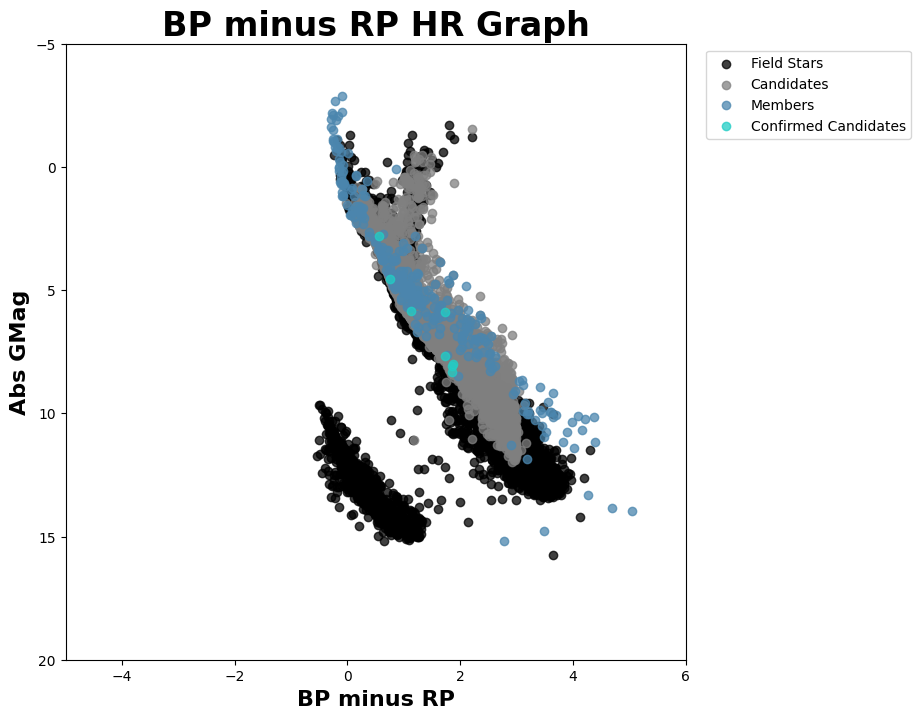

In [219]:
plt.figure(figsize=(8,8))
hr_with_candidates()